<a href="https://colab.research.google.com/github/cyyeh/scipy-lectures/blob/main/scipy_lectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scipy Lecture Notes

> One document to learn numerics, science, and data with Python

reference: https://scipy-lectures.org/index.html

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Getting started with Python for science

### [Numpy: creating and manipulating numerical data](https://scipy-lectures.org/intro/numpy/index.html)

Table of Contents

- [The Numpy array object](#scrollTo=5nUZx6q5o6PK&line=1&uniqifier=1)
  - What are Numpy and Numpy arrays?
  - Creating arrays
  - Basic data types
  - Basic visualization
  - Indexing and slicing
  - Copies and views
  - Fancy indexing
- [Numerical operations on arrays](#scrollTo=zKRdinZoqcGs&line=1&uniqifier=1)
  - Elementwise operations
  - Basic reductions
  - Broadcasting
  - Array shape manipulation
  - Sorting data
  - Summary
- More elaborate arrays
  - More data types
  - Structured data types
  - `maskedarray`: dealing with (propagation of) missing data
- Advanced operations
  - Polynomials
  - Loading data files
- Some exercises
  - Array manipulations
  - Picture manipulation: Framing a Face
  - Data statistics
  - Crude integral approximations
  - Mandelbrot set
  - Markov chain

#### The Numpy array object

In [3]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

In [4]:
%timeit [i**2 for i in range(1000)]

281 µs ± 6.51 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [5]:
%timeit np.arange(1000)

1.41 µs ± 9.77 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [6]:
np.array?

In [7]:
a.ndim, a.shape, len(a)

(1, (4,), 4)

In [16]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
np.linspace(0, 1, 6)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [14]:
np.linspace(0, 1, 5, endpoint=False)

array([0. , 0.2, 0.4, 0.6, 0.8])

In [13]:
np.ones((3, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [17]:
np.zeros((2, 2))

array([[0., 0.],
       [0., 0.]])

In [18]:
np.diag(np.array([1, 2, 3, 4]))

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

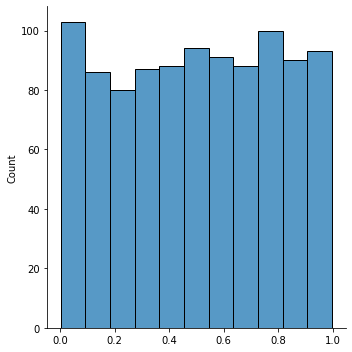

In [36]:
sns.displot(np.random.rand(1000));

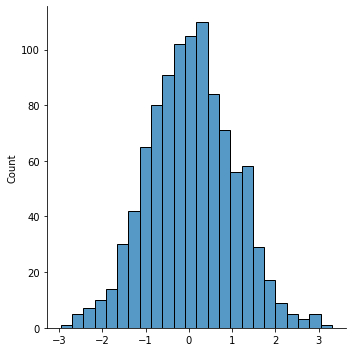

In [37]:
sns.displot(np.random.randn(1000));

In [38]:
np.random.seed(10)

In [42]:
np.empty((1,))

array([100.])

In [40]:
np.empty?

In [43]:
a = np.array([1, 2, 3])
a.dtype

dtype('int64')

In [44]:
b = np.array([1., 2., 3.])
b.dtype

dtype('float64')

In [45]:
a = np.ones((3, 3))
a.dtype

dtype('float64')

In [46]:
f = np.array(['Bonjour', 'Hello', 'Hallo'])
f.dtype

dtype('<U7')

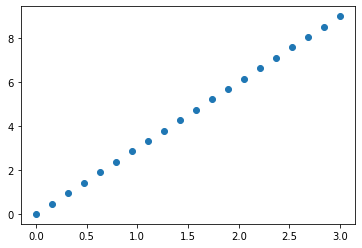

In [48]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y, 'o');

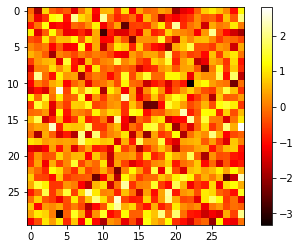

In [50]:
image = np.random.randn(30, 30)
plt.imshow(image, cmap=plt.cm.hot);
plt.colorbar();

In [51]:
a = np.arange(10)
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [54]:
a = np.diag(np.arange(3))
a[1, 1]

1

In [58]:
np.arange(0, 51, 10)[:, np.newaxis]

array([[ 0],
       [10],
       [20],
       [30],
       [40],
       [50]])

In [59]:
np.arange(6) + np.arange(0, 51, 10)[:, np.newaxis]

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [64]:
a = np.ones((4, 4), dtype=int)
a[2][3] = 2
a[3][1] = 6
a

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 6, 1, 1]])

In [79]:
a = np.concatenate((np.zeros((1, 5)), np.diag(np.array([2, 3, 4, 5, 6], dtype=float))))
a

array([[0., 0., 0., 0., 0.],
       [2., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0.],
       [0., 0., 4., 0., 0.],
       [0., 0., 0., 5., 0.],
       [0., 0., 0., 0., 6.]])

In [83]:
np.tile(np.array([[4, 3], [2, 1]]), (2, 3))

array([[4, 3, 4, 3, 4, 3],
       [2, 1, 2, 1, 2, 1],
       [4, 3, 4, 3, 4, 3],
       [2, 1, 2, 1, 2, 1]])

In [84]:
a = np.arange(10)
b = a[::2]
# check if two arrays share the same memory block.
# Note however, that this uses heuristics and may give you false positives.
np.may_share_memory(a, b)

True

In [85]:
b[0] = 12
a

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [86]:
a = np.arange(10)
c = a[::2].copy()
c[0] = 12
np.may_share_memory(a, c)

False

In [87]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [89]:
a = np.random.randint(0, 21, 15)
mask = (a % 3 == 0)
mask

array([False, False,  True, False,  True,  True,  True, False,  True,
       False, False, False, False,  True,  True])

In [91]:
a[mask]

array([15,  9, 15, 15, 12, 12,  6])

#### Numerical operations on arrays


In [92]:
a = np.array([1, 2, 3, 4])

In [93]:
a + 1

array([2, 3, 4, 5])

In [94]:
a ** 2

array([ 1,  4,  9, 16])

In [96]:
b = np.ones(4) + 1
a - b

array([-1.,  0.,  1.,  2.])

In [97]:
a * b

array([2., 4., 6., 8.])

In [98]:
a = np.arange(10000)

In [99]:
%timeit a + 1

5.45 µs ± 1.76 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [100]:
%timeit [i+1 for i in range(10000)] 

729 µs ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [101]:
c = np.ones((3, 3))
c.dot(c) # matrix multiplication

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

In [105]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
c = np.array([1, 2, 3, 4])

a == b

array([False,  True, False,  True])

In [106]:
np.array_equal(a, b)

False

In [107]:
np.array_equal(a, c)

True

### Matplotlib: plotting

### Scipy: high-level scientific computing

## 2. Advanced topics

### Advanced Python Constructs

### Advanced Numpy

### Debugging Code

### Optimizing Code

### Sparse Matrices in Scipy

### Image manipulation and processing using Numpy and Scipy

### Mathematical optimization: finding minimia of functions

### Interfacing with C

## 3. Packages and applications

### Statistics in Python

### Simpy: Symbolic Mathematics in Python

### Scikit-image: image processing

### Traits: building interactive dialogs

### 3D plotting with Mayavi

### scikit-learn: maching learning in Python